In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [108]:
# Q1 w/ different thresholds

In [109]:
# From Week 8 Lecture
glass.Type.value_counts().sort_index()

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressionModel = LogisticRegression()
regressionModel.fit(X_train, y_train)

prob = regressionModel.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    predictions = (probs >= threshold).astype(int)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Threshold: 0.30, Accuracy: 0.81, Precision: 0.60, Recall: 0.82
Threshold: 0.40, Accuracy: 0.84, Precision: 0.70, Recall: 0.64
Threshold: 0.50, Accuracy: 0.88, Precision: 0.88, Recall: 0.64
Threshold: 0.60, Accuracy: 0.86, Precision: 1.00, Recall: 0.45
Threshold: 0.70, Accuracy: 0.81, Precision: 1.00, Recall: 0.27
Threshold: 0.80, Accuracy: 0.79, Precision: 1.00, Recall: 0.18
Threshold: 0.90, Accuracy: 0.79, Precision: 1.00, Recall: 0.18


In [111]:
#2 Other columns

In [112]:
columns = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']

for column in columns:
    X = np.array(glass[column]).reshape(-1,1)
    y = glass.household
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    regressionModel = LogisticRegression()
    regressionModel.fit(X_train, y_train)
    prob = regressionModel.predict_proba(X_test)[:, 1]
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    for threshold in thresholds:
        predictions = (probs >= threshold).astype(int)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        
        print(f"Element:{column}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}") 

Element:RI, Threshold: 0.30, Accuracy: 0.81, Precision: 0.60, Recall: 0.82
Element:RI, Threshold: 0.40, Accuracy: 0.84, Precision: 0.70, Recall: 0.64
Element:RI, Threshold: 0.50, Accuracy: 0.88, Precision: 0.88, Recall: 0.64
Element:RI, Threshold: 0.60, Accuracy: 0.86, Precision: 1.00, Recall: 0.45
Element:RI, Threshold: 0.70, Accuracy: 0.81, Precision: 1.00, Recall: 0.27
Element:RI, Threshold: 0.80, Accuracy: 0.79, Precision: 1.00, Recall: 0.18
Element:RI, Threshold: 0.90, Accuracy: 0.79, Precision: 1.00, Recall: 0.18
Element:Na, Threshold: 0.30, Accuracy: 0.81, Precision: 0.60, Recall: 0.82
Element:Na, Threshold: 0.40, Accuracy: 0.84, Precision: 0.70, Recall: 0.64
Element:Na, Threshold: 0.50, Accuracy: 0.88, Precision: 0.88, Recall: 0.64
Element:Na, Threshold: 0.60, Accuracy: 0.86, Precision: 1.00, Recall: 0.45
Element:Na, Threshold: 0.70, Accuracy: 0.81, Precision: 1.00, Recall: 0.27
Element:Na, Threshold: 0.80, Accuracy: 0.79, Precision: 1.00, Recall: 0.18
Element:Na, Threshold: 0.

In [113]:
#3 Fit a Logistic Regression Model

In [131]:
X = glass.drop(columns=['Type', 'household'])
y = glass['household']

numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9692307692307692


In [ ]:
#4 Plot Roc Curves for each model

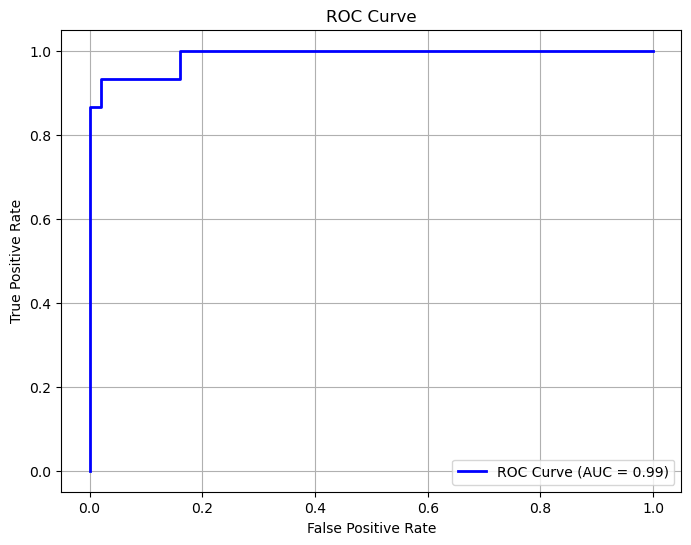

In [137]:
probabilities = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Clustering
# Different Values of K

In [139]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
plt.style.use('fivethirtyeight')

df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1] [[0.41203704 0.27690972 0.55896893 0.52083333]
 [0.66773504 0.44310897 0.7571708  0.78205128]
 [0.19611111 0.59083333 0.07864407 0.06      ]]


C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Score')

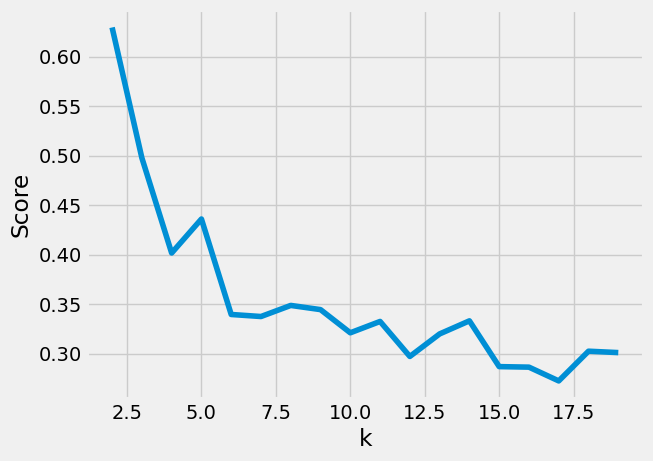

In [153]:
cols = df.columns[:-1]
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])


k = 3

kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print(labels,centroids)
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 2 0 2 0 2 2 0 0 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 0 0 0 0 2 0 0 0 0 0 2 0 0 3 2 3 2 3 3 0 3 2 3 3
 2 3 2 2 3 2 3 3 0 3 2 3 2 3 3 2 2 3 3 3 3 3 2 2 3 3 2 2 3 3 3 2 3 3 3 2 2
 3 2] [[0.35632184 0.23706897 0.50905903 0.47126437]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.54166667 0.375      0.65657789 0.64186508]
 [0.73850575 0.47270115 0.82291058 0.86350575]]


C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Score')

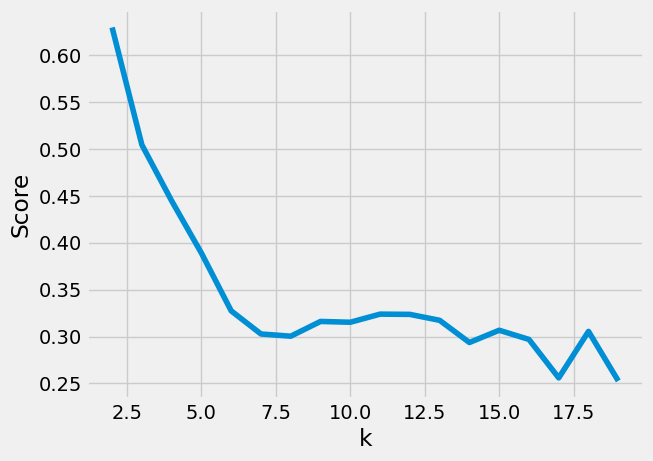

In [155]:
k = 4

kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print(labels,centroids)
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 0 4 0 4 0 4 0 0 4 0 4 0 4 4 0 0 0 3 4 4 4
 4 4 4 4 4 0 0 0 0 3 0 4 4 0 0 0 0 4 0 0 0 0 0 4 0 0 2 3 2 3 2 2 0 2 3 2 3
 3 2 3 3 2 3 2 2 0 2 3 2 3 2 2 3 3 3 2 2 2 3 4 3 2 2 3 3 2 2 2 3 2 2 2 3 3
 2 3] [[0.35119048 0.23363095 0.5090799  0.4702381 ]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.75534188 0.48237179 0.83116037 0.86698718]
 [0.51570048 0.3442029  0.71039057 0.74275362]
 [0.57246377 0.4057971  0.60869565 0.55978261]]


C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Score')

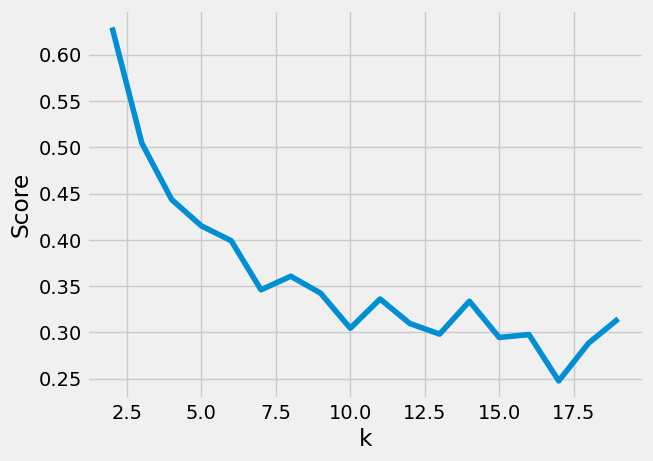

In [157]:
k = 5

kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print(labels,centroids)
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

In [ ]:
# When changins the k value increase, the inertia decreases
# If the Cluster is well-defined the scores are higher
# If you dont scale your features the clusters there will be biased results, and they wont be accurate
# The optimal k is the point where the clusters are most defined and the results are not biased. By using different methods of analysis you are able to find the right k.
